In [1]:
# Importing libraries:

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### EDA:

In [2]:
# Data uploading:
data = pd.read_csv('customer_segmentation_data.csv')

In [3]:
data.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [4]:
data.describe()

,minutes_watched,CLV,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


Legend:

minutes watched	-the number of minutes a student has watched since joining the program

CLV	- the total amount of revenue generated by that customer

Region - where the student comes from: 0: USA, Canada, United Kingdom, Australia, 1: Western Europe, 2: Rest

Channel	- channel through which the customer has learned about the program: 1: Google, 2: Facebook, 3: YouTube, 4: LinkedIn, 5: Twitter, 6:	Instagram, 7: Friend, 8: Other.

In [5]:
print(data.dtypes)

minutes_watched    float64
CLV                float64
region               int64
channel              int64
dtype: object


In [6]:
# Missing values:

print(data.isna().sum())

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64


The missing values are only in column 'minutes_watched' with non-empty 'CVL' column which means the student didn't see any content yet but made the purchase.
I leave the rows with missing values and adding 0.

In [7]:
# Replacing missing values with 0:
data.loc[:,'minutes_watched'] = data['minutes_watched'].fillna(0)

### Correlation:

In [8]:
data.corr()

,minutes_watched,CLV,region,channel
minutes_watched,1.000000,0.114153,0.040100,-0.003718
CLV,0.114153,1.000000,-0.273312,-0.026359
region,0.040100,-0.273312,1.000000,0.015098
channel,-0.003718,-0.026359,0.015098,1.000000


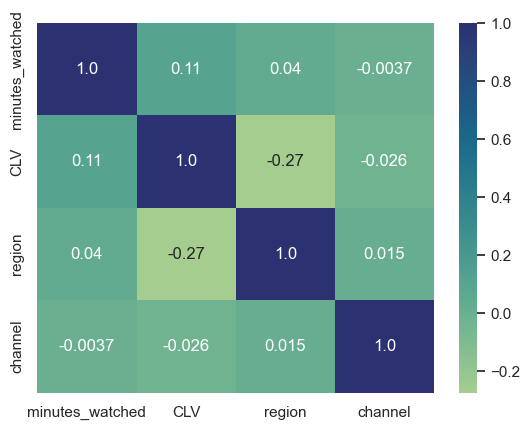

In [9]:
sns.heatmap(data.corr(), cmap='crest', annot=True, fmt=".2")
plt.show()

### Data visualization:

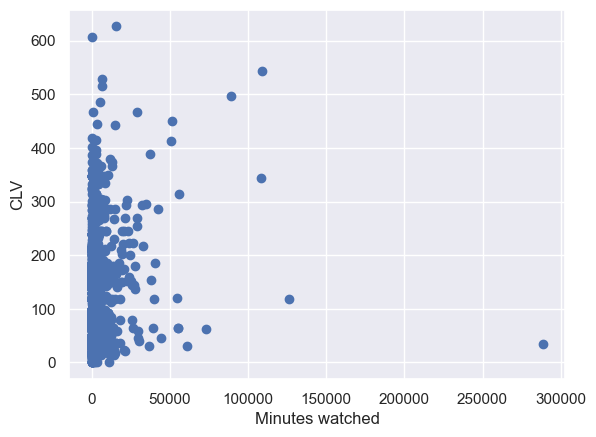

In [10]:
# Visualization of the numerical columns: 'Minutes_watched' and 'CLV':

plt.scatter(data.iloc[:, 0], data.iloc[:, 1])

plt.xlabel('Minutes watched')
plt.ylabel('CLV')

plt.show()

### Dummy variables:

In [11]:
# Creating a list of the channels of acquisition variable:
data_channel = data['channel']

In [12]:
# Creating a list of the channels of the country variable:
data_region = data['region'] 

In [13]:
dummies = pd.get_dummies(data_region, prefix = 'region', prefix_sep = '_')
data = pd.concat([data, dummies], axis = 1)
dummies1 = pd.get_dummies(data_channel, prefix = 'channel', prefix_sep = '_')
data = pd.concat([data, dummies1], axis = 1)
data = data.drop(['channel'], axis = 1)

In [14]:
data

,minutes_watched,CLV,region,region_0,region_1,region_2,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,3197.0,205.42,2,False,False,True,False,False,False,True,False,False,False,False
1,63.0,149.99,0,True,False,False,True,False,False,False,False,False,False,False
2,605.0,119.00,2,False,False,True,False,True,False,False,False,False,False,False
3,20.0,240.00,2,False,False,True,False,False,False,True,False,False,False,False
4,245.0,184.36,1,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,11.0,79.00,0,True,False,False,False,False,True,False,False,False,False,False
3830,28.0,79.00,0,True,False,False,False,True,False,False,False,False,False,False
3831,57.0,36.00,2,False,False,True,False,True,False,False,False,False,False,False
3832,44.0,36.00,2,False,False,True,True,False,False,False,False,False,False,False


In [15]:
# Changing the names for channels and regions:
data = data.rename(columns = {'channel_1':'Google', 'channel_2':'Facebook', 'channel_3':'YouTube','channel_4':'LinkedIn',
                              'channel_5':'Twitter', 'channel_6':'Instagram', 'channel_7':'Friend', 'channel_8':'Other',
                              'country_region_0':'Region_0','country_region_1':'Region_1','country_region_2':'Region_2'})

In [16]:
data.head()

,minutes_watched,CLV,region,region_0,region_1,region_2,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other
0,3197.0,205.42,2,False,False,True,False,False,False,True,False,False,False,False
1,63.0,149.99,0,True,False,False,True,False,False,False,False,False,False,False
2,605.0,119.00,2,False,False,True,False,True,False,False,False,False,False,False
3,20.0,240.00,2,False,False,True,False,False,False,True,False,False,False,False
4,245.0,184.36,1,False,True,False,False,False,False,True,False,False,False,False


### Standardization
Before applying k-means and hierarchical clustering:

In [17]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

### Hierarchical Clustering

In [18]:
# Performing hierarchical clustering by using 'ward' method:
hier_clust = linkage(data_std, method = 'ward')

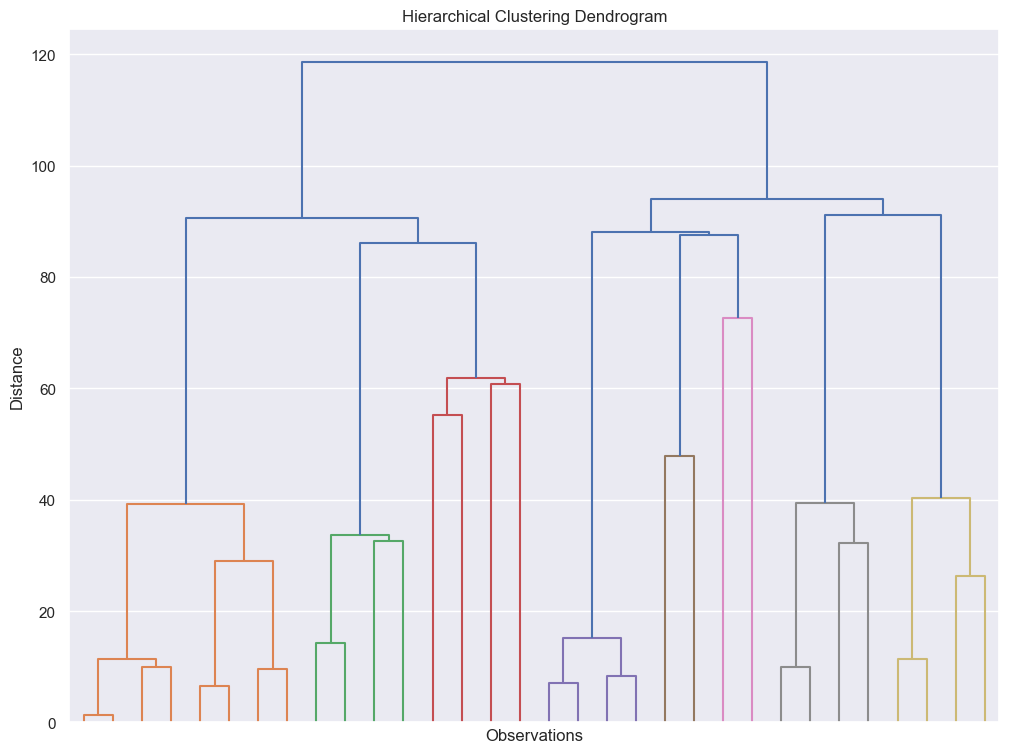

In [19]:
plt.figure(figsize = (12,9))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')

# Creating the dendrogram for the hierarchical clustering:
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 4,
           show_leaf_counts = False,
           no_labels = True)

plt.show()

### K-means

In [20]:
# Storing WCSS:
wcss = []

# Searching an optimal number of clusters for k-means:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)

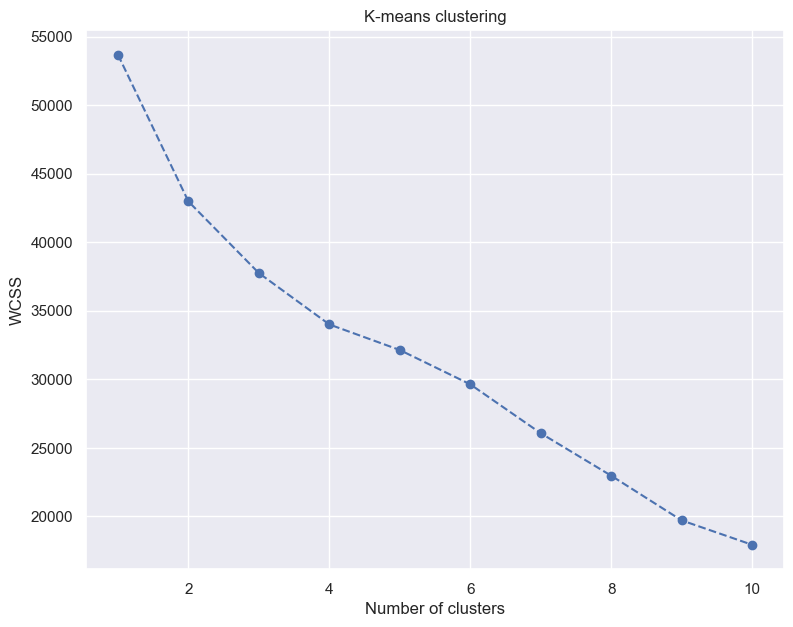

In [21]:
plt.figure(figsize = (9,7))

# The plot using Elbow Method:
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means clustering')

plt.show()

In this case, it's better to go with the number of clusters from the first method as it determines on its own how many clusters are needed and gives the same result every time. Except that, k-means is more sensitive to outliers which still remain in the dataset.

In [22]:
# Running k-means with 8 clusters:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)

In [23]:
kmeans.fit(data_std)

KMeans(random_state=42)

### Result

In [24]:
# Using copy of original file to not make any modifications:
segmentation_kmeans = data.copy()

# Adding cluster labels generated by k-means to a new column:
segmentation_kmeans['Segment'] = kmeans.labels_

In [25]:
# Checking mean for each segment:
segm_analysis = segmentation_kmeans.groupby(['Segment']).mean()

segm_analysis

,minutes_watched,CLV,region,region_0,region_1,region_2,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other
Segment,,,,,,,,,,,,,,
0,2283.051896,100.818493,2.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.509980,0.390220,0.0,0.0,0.000000,0.099800
1,1539.152607,136.329469,0.000000,1.000000,0.000000,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.000000,0.140284
2,1874.747312,157.922581,1.000000,0.000000,1.000000,0.000000,0.217742,0.0,0.341398,0.188172,0.0,0.0,0.145161,0.107527
3,1834.219512,98.188110,2.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,2767.643791,108.260359,1.323529,0.287582,0.101307,0.611111,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
5,2018.969340,109.117382,1.419811,0.290094,0.000000,0.709906,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000
6,985.327586,93.151552,1.603448,0.172414,0.051724,0.775862,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000
7,1299.332180,115.180277,1.186851,0.311419,0.190311,0.498270,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000


In [26]:
# Counting the number of observations for each segment:

segm_analysis['no_of_observations'] = segmentation_kmeans[['Segment','region']].groupby(['Segment']).count()
segm_analysis['proportion_of_observations'] = segm_analysis['no_of_observations'] / segm_analysis['no_of_observations'].sum()

segm_analysis['no_of_observations'] = segmentation_kmeans[['Segment','region']].groupby(['Segment']).count()

segm_analysis['proportion_of_observations'] = segm_analysis['no_of_observations'] / segm_analysis['no_of_observations'].sum()
segm_analysis.round(2)

,minutes_watched,CLV,region,region_0,region_1,region_2,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,no_of_observations,proportion_of_observations
Segment,,,,,,,,,,,,,,,,
0,2283.05,100.82,2.00,0.00,0.00,1.00,0.00,0.0,0.51,0.39,0.0,0.0,0.00,0.10,1002,0.26
1,1539.15,136.33,0.00,1.00,0.00,0.00,0.25,0.0,0.43,0.18,0.0,0.0,0.00,0.14,1055,0.28
2,1874.75,157.92,1.00,0.00,1.00,0.00,0.22,0.0,0.34,0.19,0.0,0.0,0.15,0.11,372,0.10
3,1834.22,98.19,2.00,0.00,0.00,1.00,1.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,328,0.09
4,2767.64,108.26,1.32,0.29,0.10,0.61,0.00,1.0,0.00,0.00,0.0,0.0,0.00,0.00,306,0.08
5,2018.97,109.12,1.42,0.29,0.00,0.71,0.00,0.0,0.00,0.00,0.0,0.0,1.00,0.00,424,0.11
6,985.33,93.15,1.60,0.17,0.05,0.78,0.00,0.0,0.00,0.00,1.0,0.0,0.00,0.00,58,0.02
7,1299.33,115.18,1.19,0.31,0.19,0.50,0.00,0.0,0.00,0.00,0.0,1.0,0.00,0.00,289,0.08


In [27]:
# Renaming segment numbers:

segm_analysis = segm_analysis.rename({0:'Youtube & Linkedin Users',
                         1:'Youtube & English Speakers',
                         2:'Youtube mix and WE',
                         3:'Google Users',
                         4:'Facebook Users', 
                         5:'Friend`s recommendation',
                         6:'Twitter Users',
                         7:'Instagram Users'})

To remind: Regions: 0: USA, Canada, United Kingdom, Australia, 1: Western Europe, 2: Rest

Basic characteristics of each segment:

Segment 0 - Youtube & Linkedin Users- from rest of the world. They have learned about the program mostly from Youtube and Linkedin and other. They have a high engagement and moderate spending.

Segment 1 – Youtube & English speakers: customers from the US, Canada, UK and Australia. They have learned about the program mostly from Youtube but also: Google, Linkedin and other. They have a high engagement and quite high spending.

Segment 2 – Youtube mix and Western Europe: are from Western Europe and they have learned about the program mostly from Youtube but also: Google and Linkedin, by friend's recommendation and other. With a high engagement and the highest spending.

Segment 3 – Google Users: customers only from the rest of the world who have heard about the platform from Google. They have a high level of engagement but little low spending.

Segment 4 – Facebook Users: from all regions, mostly from the rest of the world. With the highest level of engagement and moderate spending.

Segment 5 -Friend's recommendation: most of the customers are from the rest of the world. With a high engagement and moderate spending.

Segment 6 - Twitter Users: from all regions, mostly from the rest of the world. With the lowest engagement but quite moderate spending based on he size of group.

Segment 7 – Instagram Users: are from all regions. An average level of engagement and money spent.

In [28]:
segm_analysis

,minutes_watched,CLV,region,region_0,region_1,region_2,Google,Facebook,YouTube,LinkedIn,Twitter,Instagram,Friend,Other,no_of_observations,proportion_of_observations
Segment,,,,,,,,,,,,,,,,
Youtube & Linkedin Users,2283.051896,100.818493,2.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.509980,0.390220,0.0,0.0,0.000000,0.099800,1002,0.261346
Youtube & English Speakers,1539.152607,136.329469,0.000000,1.000000,0.000000,0.000000,0.248341,0.0,0.432227,0.179147,0.0,0.0,0.000000,0.140284,1055,0.275170
Youtube mix and WE,1874.747312,157.922581,1.000000,0.000000,1.000000,0.000000,0.217742,0.0,0.341398,0.188172,0.0,0.0,0.145161,0.107527,372,0.097027
Google Users,1834.219512,98.188110,2.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,328,0.085550
Facebook Users,2767.643791,108.260359,1.323529,0.287582,0.101307,0.611111,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,306,0.079812
Friend`s recommendation,2018.969340,109.117382,1.419811,0.290094,0.000000,0.709906,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,424,0.110589
Twitter Users,985.327586,93.151552,1.603448,0.172414,0.051724,0.775862,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,58,0.015128
Instagram Users,1299.332180,115.180277,1.186851,0.311419,0.190311,0.498270,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,289,0.075378


In [29]:
# Addding a name of segment to each row:
segmentation_kmeans['Segment_name'] = segmentation_kmeans['Segment'].map({0:'Youtube & Linkedin Users',
                         1:'Youtube & English Speakers',
                         2:'Youtube mix and WE',
                         3:'Google Users',
                         4:'Facebook Users', 
                         5:'Friend`s recommendation',
                         6:'Twitter Users',
                         7:'Instagram Users'})

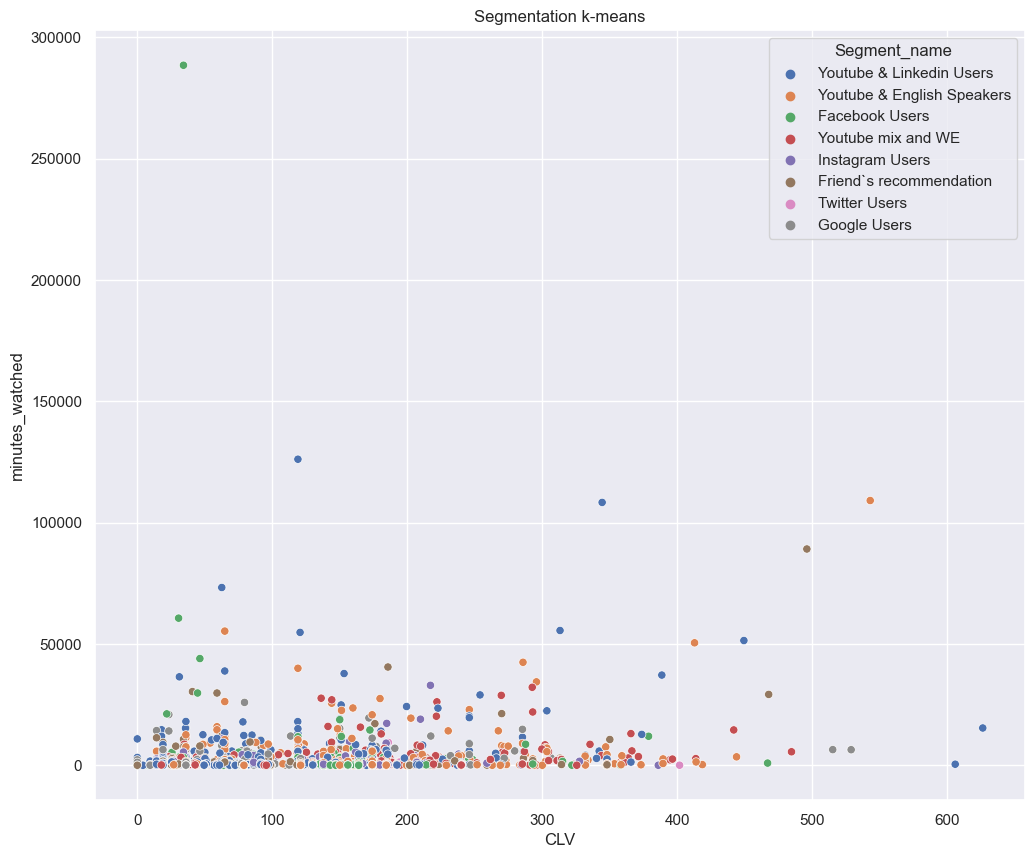

In [30]:
x_axis = segmentation_kmeans['CLV']
y_axis = segmentation_kmeans['minutes_watched']

plt.figure(figsize = (12, 10))

sns.scatterplot(x = x_axis, y = y_axis, hue = segmentation_kmeans['Segment_name'], palette='deep')
plt.title('Segmentation k-means')

plt.show()